In [ ]:

import os
os.environ["CUDA_DEVICE_ORDER"] = 'PCI_BUS_ID'
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from tensorflow.keras.applications import ResNet50


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow

In [ ]:
print(tensorflow.__version__)

2.5.0


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.5.0


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from os import listdir
from sklearn.metrics import accuracy_score
!pip install tensorflow_hub
!pip install bert-tensorflow==1.0.1
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import tensorflow_hub as hub  #pip install tensorflow_hub
import os
from bert import tokenization
from bert.tokenization import FullTokenizer
from tqdm import tqdm_notebook
from tensorflow.compat.v1.keras import backend as K
# from keras import backend as K
# Initialize session
# sess = tf.Session()
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) #command to run codeon multiple gpu



# Params for bert model and tokenization
bert_path = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"
!pip install keras-lr-finder
from keras_lr_finder import LRFinder
!pip install talos as ta
import talos as ta
from pprint import pprint
from talos.utils import live
tf.logging.set_verbosity(tf.logging.ERROR)
from random import choice
import gc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



Device mapping: no known devices.


In [ ]:
!pip install tensorflow_hub

In [ ]:
from talos.model.normalizers import lr_normalizer

In [ ]:
np.random.seed(42)
tf.set_random_seed(42)

In [ ]:
def get_df(file):
    return pd.read_csv(file,sep = '\t')

In [ ]:
train_df = get_df('/content/drive/MyDrive/mediaeval2015/train_posts.txt')
test_df = get_df('/content/drive/MyDrive/mediaeval2015/test_posts.txt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def return_first_image(row):
    return row['imageId(s)'].split(',')[0].strip()

In [ ]:
train_df['first_image_id'] = train_df.progress_apply (lambda row: return_first_image(row),axis=1)

In [ ]:
train_df

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,first_image_id
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,sandyA_fake_46
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,sandyA_fake_09
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,sandyA_fake_09
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,sandyA_fake_29
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,sandyA_fake_15
...,...,...,...,...,...,...,...,...
14272,443231991593304064,@BobombDom *slaps TweetDeck with the PigFish h...,2179310905,pigFish_01,Da_Vault_Hunter,Tue Mar 11 03: 48: 36 +0000 2014,fake,pigFish_01
14273,443086239127076865,New Species of Fish found in Brazil or just Re...,254843101,pigFish_01,DjSituation_RC,Mon Mar 10 18: 09: 26 +0000 2014,fake,pigFish_01
14274,442978105238753280,What do we call this? #pigFISH http: \/\/t.co\...,2367553228,pigFish_01,Vivo1Vuyo,Mon Mar 10 10: 59: 45 +0000 2014,fake,pigFish_01
14275,442753479782989824,Pigfish ? E dopo il pescecane c'è il pesce mai...,603120231,pigFish_01,CosimoTarta,Sun Mar 09 20: 07: 10 +0000 2014,fake,pigFish_01


In [ ]:
test_df.shape

(3755, 7)

In [ ]:
test_df

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake
...,...,...,...,...,...,...,...
3750,578433150071775232,Un présentateur de la ZDF confesse avoir truqu...,257551211,varoufakis_1,Cdt_Sylvestre,Thu Mar 19 05:49:44 +0000 2015,fake
3751,578433646597656576,"Oh les kleine menteurs ""@CorineBarella: Un pré...",27575883,varoufakis_1,damomarc,Thu Mar 19 05:51:42 +0000 2015,fake
3752,578486910491996160,Este es el programa de ZDF en el que confirman...,2049211,varoufakis_1,javierpascual,Thu Mar 19 09:23:21 +0000 2015,fake
3753,578505023912591360,11.34 - wir haben FAST Mittag ▶ Riesen Verwirr...,262222386,varoufakis_1,aotto1968_2,Thu Mar 19 10:35:20 +0000 2015,fake


In [ ]:
train_df.shape

(14277, 8)

In [ ]:
train_df['first_image_id'] = train_df.progress_apply (lambda row: return_first_image(row),axis=1)

In [ ]:
images_train_dataset = [i for i in train_df['first_image_id'].tolist()]
images_train_folder = [i.split('.')[0].strip() for i in listdir('/content/drive/MyDrive/mediaeval2015/images_train')]
images_train_not_available = set(images_train_dataset)-set(images_train_folder)
images_train_not_available

{'boston_fake_35', 'sandyB_real_4', 'sandyB_real_6', 'sochi_fake_1fake'}

In [ ]:

images_test_dataset = [i.split(',')[0].strip() for i in test_df['imageId(s)'].tolist()]
images_test_folder = [i.split('.')[0].strip() for i in listdir('/content/drive/MyDrive/mediaeval2015/images_test')]
images_test_not_available = set(images_test_dataset)-set(images_test_folder)
images_test_not_available

{'eclipse_video_01', 'syrianboy_1', 'varoufakis_1'}

In [ ]:
train_df = train_df[~train_df['first_image_id'].isin(images_train_not_available)]
test_df = test_df[~test_df['imageId(s)'].isin(images_test_not_available)]

train_text = train_df['tweetText'].tolist()
test_text = test_df['tweetText'].tolist()

train_images = [i for i in train_df['first_image_id'].tolist()]
test_images = [i.split(',')[0].strip() for i in test_df['imageId(s)'].tolist()]

trainY = train_df['label'].tolist()
trainY = [1 if i=='real' else 0 for i in trainY]

testY = test_df['label'].tolist()
testY = [1 if i=='real' else 0 for i in testY]

In [ ]:
print(trainY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(trainY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
len(train_text),len(train_images),len(trainY),len(test_text),len(test_images),len(testY)

(14258, 14258, 14258, 1925, 1925, 1925)

In [ ]:

# calculate the maximum document length
def max_length(lines):
    return max([len(s.split()) for s in lines])

In [ ]:
print(trainY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

maximum length: 901


(array([   0.,    4.,  327.,  532.,  755.,  760.,  843.,  791.,  904.,
        2534., 2379.,  775., 1462., 1113., 1047.,   17.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 15, 16, 18, 20, 25, 30]),
 <a list of 16 Patch objects>)

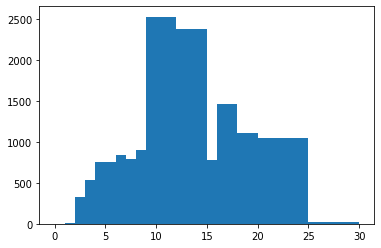

In [ ]:
print("maximum length:", max_length(train_text))
plt.hist([len(s.split()) for s in train_text],bins=[0,1,2,3,4,5,6,7,8,9,12,15,16,18,20,25,30])

In [ ]:
print(trainY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
l=[len(s.split()) for s in train_text]
count=0.0
for i in l:
    if i>22:
        count+=1
print(count,len(l))
print(count/len(l))

128.0 14258
0.008977416187403563


In [ ]:
max_seq_length=23

In [ ]:
print(trainY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
class PaddingInputExample(object):
    """Fake example so the num input examples is a multiple of the batch size.
  When running eval/predict on the TPU, we need to pad the number of examples
  to be a multiple of the batch size, because the TPU requires a fixed batch
  size. The alternative is to drop the last batch, which is bad because it means
  the entire output data won't be generated.
  We use this class instead of `None` because treating `None` as padding
  battches could cause silent errors.
  """

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
    Args:
      guid: Unique id for the example.
      text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
      text_b: (Optional) string. The untokenized text of the second sequence.
        Only must be specified for sequence pair tasks.
      label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

def create_tokenizer_from_hub_module():
    """Get the vocab file and casing info from the Hub module."""
    bert_module =  hub.Module(bert_path)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    vocab_file, do_lower_case = sess.run(
        [
            tokenization_info["vocab_file"],
            tokenization_info["do_lower_case"],
        ]
    )

    return FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)

def convert_single_example(tokenizer, example, max_seq_length=256):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        input_ids = [0] * max_seq_length
        input_mask = [0] * max_seq_length
        segment_ids = [0] * max_seq_length
        label = 0
        return input_ids, input_mask, segment_ids, label

    tokens_a = tokenizer.tokenize(example.text_a)
    if len(tokens_a) > max_seq_length - 2:
        tokens_a = tokens_a[0 : (max_seq_length - 2)]

    tokens = []
    segment_ids = []
    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, example.label

def convert_examples_to_features(tokenizer, examples, max_seq_length=256):
    """Convert a set of `InputExample`s to a list of `InputFeatures`."""

    input_ids, input_masks, segment_ids, labels = [], [], [], []
    for example in tqdm_notebook(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(
            tokenizer, example, max_seq_length
        )
        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)
    return (
        np.array(input_ids),
        np.array(input_masks),
        np.array(segment_ids),
        np.array(labels).reshape(-1, 1),
    )

def convert_text_to_examples(texts, labels):
    """Create InputExamples"""
    InputExamples = []
    for text, label in zip(texts, labels):
        InputExamples.append(
            InputExample(guid=None, text_a=" ".join(text), text_b=None, label=label)
        )
    return InputExamples

# Instantiate tokenizer
tokenizer = create_tokenizer_from_hub_module()



In [ ]:
print(trainY)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Convert data to InputExample format
train_examples = convert_text_to_examples(train_text, trainY)
test_examples = convert_text_to_examples(test_text, testY)

# Convert to features
(train_input_ids, train_input_masks, train_segment_ids, trainY 
) = convert_examples_to_features(tokenizer, train_examples, max_seq_length=max_seq_length)
(test_input_ids, test_input_masks, test_segment_ids, testY
) = convert_examples_to_features(tokenizer, test_examples, max_seq_length=max_seq_length)

In [ ]:
print(trainY)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
length = 224
width = 224
channels = 3

In [ ]:
def read_and_process_image(list_of_images):
    X = [] 
    for image in tqdm(list_of_images):
        try:
           X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (length,width), interpolation=cv2.INTER_CUBIC))  
        except:
          print(image)
            
    return X

In [ ]:
images = listdir('/content/drive/MyDrive/mediaeval2015/images_train')
images.extend(listdir('/content/drive/MyDrive/mediaeval2015/images_test'))
jpg = []
png=[]
jpeg=[]
gif = []

for i in images:
    name,ext = i.split('.')[0],i.split('.')[-1]
    #print(name)
    #print(ext)
    #print(eval(ext))
    #eval(ext).append(name)
    if(ext == "jpg"):
      jpg.append(name)
    if(ext == "jpeg"):
      jpeg.append(name)
    if(ext == "gif"):
      gif.append(name)
    if(ext == "png"):
      png.append(name)
#print(jpg)
#print(png)
#print(gif)
#print(jpeg)

In [ ]:
def get_extension_of_file(file_name):
    if file_name in jpg:
        return '.jpg'
    elif file_name in png:
        return '.png'
    elif file_name in jpeg:
        return '.jpeg'
    else:
        return '.gif'


In [ ]:
train_images = ['/content/drive/MyDrive/mediaeval2015/images_train/'+i+get_extension_of_file(i) for i in train_images]
test_images = ['/content/drive/MyDrive/mediaeval2015/images_test/'+i+get_extension_of_file(i) for i in test_images]

print(train_images)

['/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_46.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_09.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_09.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_29.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_15.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_23.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_14.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_29.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_15.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_29.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_08.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_29.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_11.jpg', '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_

In [ ]:
print(test_images)

['/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.jpg', '/content/drive/MyDrive/mediaeval2015/images_test/eclipse_01.

In [ ]:
train_imagesX = read_and_process_image(train_images)
test_imagesX = read_and_process_image(test_images)

/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif
/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif
/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif
/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif
/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif
/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif
/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif
/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif
/content/drive/MyDrive/mediaeval2015/images_train/boston_fake_10.gif



/content/drive/MyDrive/mediaeval2015/images_test/eclipse_video_01.gif
/content/drive/MyDrive/mediaeval2015/images_test/eclipse_video_01.gif



In [ ]:
np.save('train_imagesX', train_images)
np.save('test_imagesX', test_images)


In [ ]:
train_imagesX = np.load('train_imagesX.npy')
test_imagesX = np.load('test_imagesX.npy')

In [ ]:
print(train_imagesX)

['/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_46.jpg'
 '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_09.jpg'
 '/content/drive/MyDrive/mediaeval2015/images_train/sandyA_fake_09.jpg'
 ... '/content/drive/MyDrive/mediaeval2015/images_train/pigFish_01.jpg'
 '/content/drive/MyDrive/mediaeval2015/images_train/pigFish_01.jpg'
 '/content/drive/MyDrive/mediaeval2015/images_train/pigFish_01.jpg']


In [ ]:
print(train_imagesX.shape)

(14258,)


In [ ]:
#train_imagesX = np.rollaxis(train_imagesX, 3, 1)
#test_imagesX = np.rollaxis(test_imagesX,3,1)

In [ ]:
class BertLayer(tf.compat.v1.keras.layers.Layer):
    def __init__(self, n_fine_tune_layers=10, **kwargs):
        self.n_fine_tune_layers = n_fine_tune_layers
        self.trainable = True
        self.output_size = 768
        super(BertLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.bert = hub.Module(
            bert_path,
            trainable=self.trainable,
            name="{}_module".format(self.name)
        )

        trainable_vars = self.bert.variables

        # Remove unused layers
        trainable_vars = [var for var in trainable_vars if not "/cls/" in var.name]

        # Select how many layers to fine tune
        trainable_vars = trainable_vars[-self.n_fine_tune_layers :]

        # Add to trainable weights
        for var in trainable_vars:
            self._trainable_weights.append(var)
            
        for var in self.bert.variables:
            if var not in self._trainable_weights:
                self._non_trainable_weights.append(var)

        super(BertLayer, self).build(input_shape)

    def call(self, inputs):
        inputs = [K.cast(x, dtype="int32") for x in inputs]
        input_ids, input_mask, segment_ids = inputs
        bert_inputs = dict(
            input_ids=input_ids, input_mask=input_mask, segment_ids=segment_ids
        )
        result = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
            "pooled_output"
        ]
        return result

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_size)

In [ ]:
def initialize_vars(sess):
    sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) #command to run codeon multiple gpu
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    K.set_session(sess)

In [ ]:
# base.trainable=False
first = True

In [ ]:
param1 = [train_input_ids, train_input_masks, train_segment_ids, train_imagesX]

In [ ]:
params={'bert_trainable' :[False,True],
    'text_no_hidden_layer':(0,3,3),
    'text_hidden_neurons':[768,400,32],
    'dropout':(0.3,0.7,4),
    'repr_size':[32],
    'vis_no_hidden_layer':(0,3,3),
    'vis_hidden_neurons':[4096,2742,1388,32],
    'final_no_hidden_layer':(0,3,3),
    'final_hidden_neurons':[64,35,5],
    'optimizer':['adam','rmsprop'],
    'batch_size':[512],
    'epochs':[10],
}

In [ ]:
#text model
def news_model(x_train, y_train, x_val, y_val, params):
    
#     pprint(params)
    try:
        del model
    except:
        pass
    K.clear_session()
    gc.collect()
    
    with tf.device('/cpu:0'):
        bert_base = BertLayer()
        bert_base.trainable= params['bert_trainable']

        in_id = tf.keras.layers.Input(shape=(max_seq_length,), name="input_ids")
        in_mask = tf.keras.layers.Input(shape=(max_seq_length,), name="input_masks")
        in_segment = tf.keras.layers.Input(shape=(max_seq_length,), name="segment_ids")
        bert_inputs = [in_id, in_mask, in_segment]
        bert_output = bert_base(bert_inputs)

        if params['text_no_hidden_layer']>0:
            for i in range(params['text_no_hidden_layer']):
                bert_output = tf.keras.layers.Dense(params['text_hidden_neurons'], activation='relu')(bert_output)
                bert_output = tf.keras.layers.Dropout(params['dropout'])(bert_output)

        text_repr = tf.keras.layers.Dense(params['repr_size'], activation='relu')(bert_output)

        #image model
        conv_base = tf.keras.applications.ResNet50(input_shape=(224,224,3), include_top=False, weights="imagenet")
        conv_base.trainable=False
#         conv_base = base

        input_image = tf.keras.layers.Input(shape=(224,224,3))
        base_output = conv_base(input_image)
        flat = tf.keras.layers.Flatten()(base_output)

        if params['vis_no_hidden_layer']>0:
            for i in range(params['vis_no_hidden_layer']):
                flat = tf.keras.layers.Dense(params['vis_hidden_neurons'], activation='relu')(flat)
                flat = tf.keras.layers.Dropout(params['dropout'])(flat)

        visual_repr = tf.keras.layers.Dense(params['repr_size'],activation='relu')(flat)


        #classifier
        combine_repr = tf.keras.layers.concatenate([text_repr, visual_repr])
        com_drop=tf.keras.layers.Dropout(params['dropout'])(combine_repr)

        if params['final_no_hidden_layer']>0:
            for i in range(params['final_no_hidden_layer']):
                com_drop = tf.keras.layers.Dense(params['final_hidden_neurons'], activation='relu')(com_drop)
                com_drop=tf.keras.layers.Dropout(params['dropout'])(com_drop)

        prediction = tf.keras.layers.Dense(1,activation='sigmoid')(com_drop)

        model = tf.keras.models.Model(inputs=[in_id,in_mask,in_segment,input_image], outputs=prediction)

   # model = tf.keras.utils.multi_gpu_model(model,gpus=1)
    
#     if params['optimizer'] == 'adam':
#         opt = tf.keras.optimizers.Adam(lr=0.0005)
#     else:
#         opt = tf.keras.optimizers.RMSprop(lr=0.00005)
        
#     model.compile(loss='binary_crossentropy', optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])), metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    initialize_vars(sess)
    
    steps_per_epoch = 1
    
    out = model.fit(x=param1, y=trainY,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    shuffle=True,
                    validation_data=[x_val, y_val],callbacks=[live()])
    
    return out, model

h = ta.Scan(x=param1, y=trainY, params=params,
            model=news_model,
            experiment_name='twitter_fake_news'
          )

  0%|          | 0/15552 [00:00<?, ?it/s]

94773248/94765736 [==============================] - 1s 0us/step
Device mapping: no known devices.


ValueError: ignored

In [ ]:
r = ta.Reporting(h)

In [ ]:
r.high('val_acc')

In [ ]:
r.plot_corr()


In [ ]:
for k in params.keys():
    print(k)
    r.plot_box(y='val_acc',x=k)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = r.data[['bert_trainable','text_no_hidden_layer','text_hidden_neurons','dropout','vis_no_hidden_layer','vis_hidden_neurons','final_no_hidden_layer','final_hidden_neurons','optimizer']]
scaler = MinMaxScaler()
y = scaler.fit_transform(r.data[['val_acc']])
X['bert_trainable'] = pd.factorize(X['bert_trainable'])[0]
X['optimizer'] = pd.factorize(X['optimizer'])[0]
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=3,n_estimators=100)
reg.fit(X,y)
pd.Series(reg.feature_importances_,index=X.columns).\
sort_values(ascending=True).plot.barh(color='grey',title='Feature Importance of Hyperparameters')

In [ ]:
r.plot_regs(x='acc',y='val_acc')


In [ ]:
r.plot_bars(x='vis_no_hidden_layer',y='val_acc',hue='dropout',col='final_no_hidden_layer')

In [ ]:
r.plot_kde()

In [ ]:
params = {
    'bert_trainable' :[False],
    'text_no_hidden_layer':[0,1],
    'text_hidden_neurons':[768],
    'dropout':[0.4],
    'repr_size':[32],
    'vis_no_hidden_layer':[1],
    'vis_hidden_neurons':[2742],
    'final_no_hidden_layer':[0,1],
    'final_hidden_neurons':[35],
    'optimizer':[tf.keras.optimizers.Adam,tf.keras.optimizers.RMSprop],
    'batch_size':[512],
    'epochs':[10],
    'lr':(0.0001,0.1,10)
}

In [ ]:
h = ta.Scan([train_input_ids, train_input_masks, train_segment_ids,train_imagesX], trainY, params=params,
            model=news_model,
            experiment_name='twitter_fake_news',
            x_val=[test_input_ids, test_input_masks, test_segment_ids,test_imagesX],
            y_val=testY,
            fraction_limit=.5)

In [ ]:
r = ta.Reporting(h)

In [ ]:
r.high('val_acc')

In [ ]:
r.data.sort_values('val_acc').tail()

In [ ]:
r.plot_corr()

In [ ]:
for k in params.keys():
    print(k)
    r.plot_box(y='val_acc',x=k)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = r.data[['text_no_hidden_layer','final_no_hidden_layer','optimizer','lr']]
scaler = MinMaxScaler()
y = scaler.fit_transform(r.data[['val_acc']])
X['optimizer'] = pd.factorize(X['optimizer'])[0]
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=3,n_estimators=100)
reg.fit(X,y)
pd.Series(reg.feature_importances_,index=X.columns).\
sort_values(ascending=True).plot.barh(color='grey',title='Feature Importance of Hyperparameters')

In [ ]:
r.plot_regs(x='acc',y='val_acc')

In [ ]:
r.plot_kde()

In [ ]:
#text model
def get_news_model( params):
    
#     pprint(params)
    K.clear_session()
    
    with tf.device('/cpu:0'):
        bert_base = BertLayer()
        bert_base.trainable= params['bert_trainable']

        in_id = tf.layers.Input(shape=(max_seq_length,), name="input_ids")
        in_mask = tf.layers.Input(shape=(max_seq_length,), name="input_masks")
        in_segment = tf.layers.Input(shape=(max_seq_length,), name="segment_ids")
        bert_inputs = [in_id, in_mask, in_segment]
        bert_output = bert_base(bert_inputs)

        if params['text_no_hidden_layer']>0:
            for i in range(params['text_no_hidden_layer']):
                bert_output = tf.layers.Dense(params['text_hidden_neurons'], activation='relu')(bert_output)
                bert_output = tf.layers.Dropout(params['dropout'])(bert_output)

        text_repr = tf.layers.Dense(params['repr_size'], activation='relu')(bert_output)

        #image model
        conv_base = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
        conv_base.trainable=False
#         conv_base = base

        input_image = tf.layers.Input(shape=(224,224,3))
        base_output = conv_base(input_image)
        flat = tf.layers.Flatten()(base_output)

        if params['vis_no_hidden_layer']>0:
            for i in range(params['vis_no_hidden_layer']):
                flat = tf.layers.Dense(params['vis_hidden_neurons'], activation='relu')(flat)
                flat = tf.layers.Dropout(params['dropout'])(flat)

        visual_repr = tf.layers.Dense(params['repr_size'],activation='relu')(flat)


        #classifier
        combine_repr = tf.keras.layers.concatenate([text_repr, visual_repr])
        com_drop=tf.layers.Dropout(params['dropout'])(combine_repr)

        if params['final_no_hidden_layer']>0:
            for i in range(params['final_no_hidden_layer']):
                com_drop = tf.layers.Dense(params['final_hidden_neurons'], activation='relu')(com_drop)
                com_drop=tf.layers.Dropout(params['dropout'])(com_drop)

        prediction = tf.layers.Dense(1,activation='sigmoid')(com_drop)

        model = tf.keras.models.Model(inputs=[in_id,in_mask,in_segment,input_image], outputs=prediction)

  #  model = tf.keras.utils.multi_gpu_model(model,gpus=4)
    
#     if params['optimizer'] == 'adam':
#         opt = tf.keras.optimizers.Adam(lr=0.0005)
#     else:
#         opt = tf.keras.optimizers.RMSprop(lr=0.00005)
        
    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'](), metrics=['accuracy'])
    initialize_vars(sess)
    
    
    return model

In [ ]:
params_adam = {
    'bert_trainable' :False,
    'text_no_hidden_layer':1,
    'text_hidden_neurons':768,
    'dropout':0.4,
    'repr_size':32,
    'vis_no_hidden_layer':1,
    'vis_hidden_neurons':2742,
    'final_no_hidden_layer':1,
    'final_hidden_neurons':35,
    'optimizer':tf.keras.optimizers.Adam
}

params_rms = {
    'bert_trainable' :False,
    'text_no_hidden_layer':1,
    'text_hidden_neurons':768,
    'dropout':0.4,
    'repr_size':32,
    'vis_no_hidden_layer':1,
    'vis_hidden_neurons':2742,
    'final_no_hidden_layer':1,
    'final_hidden_neurons':35,
    'optimizer':tf.keras.optimizers.RMSprop
}

In [ ]:
model_adam=get_news_model(params_adam)

In [ ]:
lr_finder = LRFinder(model_adam)

In [ ]:
lr_finder.find([train_input_ids, train_input_masks, train_segment_ids,train_imagesX], trainY, 0.000001, 0.01, 512, 5)

In [ ]:
lr_finder.plot_loss()

In [ ]:
model_rms=get_news_model(params_rms)

In [ ]:
lr_finder = LRFinder(model_rms)

In [ ]:
lr_finder.find([train_input_ids, train_input_masks, train_segment_ids,train_imagesX], trainY, 0.000001, 0.01, 512, 5)

In [ ]:
lr_finder.plot_loss()

In [ ]:
model_adam=get_news_model(params_adam)

In [ ]:
lr_finder = LRFinder(model_adam)

In [ ]:
lr_finder.find([train_input_ids, train_input_masks, train_segment_ids,train_imagesX], trainY, 0.00005, 0.001, 512, 7)

In [ ]:
lr_finder.plot_loss()

In [ ]:
model_rms=get_news_model(params_rms)

In [ ]:
lr_finder = LRFinder(model_rms)

In [ ]:
lr_finder.find([train_input_ids, train_input_masks, train_segment_ids,train_imagesX], trainY, 0.00001, 0.001, 512, 8)

In [ ]:
lr_finder.plot_loss()

In [ ]:
params = {
    'bert_trainable' :[False],
    'text_no_hidden_layer':[1],
    'text_hidden_neurons':[768],
    'dropout':[0.4],
    'repr_size':[32],
    'vis_no_hidden_layer':[1],
    'vis_hidden_neurons':[2742],
    'final_no_hidden_layer':[1],
    'final_hidden_neurons':[35],
    'optimizer':[tf.keras.optimizers.Adam],
    'batch_size':[128,256,512],
    'epochs':[10],
    'lr':[0.00005,0.0005,0.00075]
}

In [ ]:
h = ta.Scan([train_input_ids, train_input_masks, train_segment_ids,train_imagesX], trainY, params=params,
            model=news_model,
            experiment_name='twitter_fake_news',
            #experiment_no='3',
            x_val=[test_input_ids, test_input_masks, test_segment_ids,test_imagesX],
            y_val=testY)

In [ ]:
r = ta.Reporting(h)

In [ ]:
r.high('val_acc')

In [ ]:
r.data.sort_values('val_acc')

In [ ]:
for k in ['batch_size','lr']:
    print(k)
    r.plot_box(y='val_acc',x=k)

In [ ]:
r.data.sort_values('val_acc')

In [ ]:
params_final = {
    'bert_trainable' :False,
    'text_no_hidden_layer':1,
    'text_hidden_neurons':768,
    'dropout':0.4,
    'repr_size':32,
    'vis_no_hidden_layer':1,
    'vis_hidden_neurons':2742,
    'final_no_hidden_layer':1,
    'final_hidden_neurons':35,
    'optimizer':tf.keras.optimizers.Adam
}

In [ ]:
model=get_news_model(params_final)

In [ ]:
K.set_value(model.optimizer.lr, 0.0005)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-{epoch:03d}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='max')  

In [ ]:
out = model.fit([train_input_ids, train_input_masks, train_segment_ids,train_imagesX], trainY,
                    batch_size=256,
                    epochs=20,
                    verbose=0,
                    shuffle=True,
                    validation_data=([test_input_ids, test_input_masks, test_segment_ids,test_imagesX],testY),callbacks=[live(),checkpoint])

In [ ]:
model=get_news_model(params_final)

In [ ]:
model.load_weights('model-010-0.776923.h5')

In [ ]:
test_predict = model.predict([test_input_ids, test_input_masks, test_segment_ids,test_imagesX])
test_predict = [1 if i>=0.5 else 0 for i in test_predict]

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [ ]:
print(f'Accuracy == {accuracy_score(testY,test_predict)}')
print(f'F1 == {f1_score(testY,test_predict,average=None)}')
print(f'Precision == {precision_score(testY,test_predict,average=None)}')
print(f'Recall == {recall_score(testY,test_predict,average=None)}')